In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras

In [4]:
df = pd.read_csv('TrainableData.csv')
df.head()

,Unnamed: 0,zip,number_of_properties,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment,total_employment_pct_chg,office_employment,office_employment_pct_chg,industrial_employment,industrial_employment_pct_chg,households,households_pct_chg,population,population_pct_chg,household_avg_income,household_avg_income_pct_chg,Liking
0,7,77072.0,0.255556,0,1,0.215686,0,0.0,0.522472,0.537313,0.482890,0.191542,0.526832,0.128822,0.790339,0.171594,0.802582,0.296032,0.842993,0.136222,0.506133,0.141550,0.633837,0.112065,0.740644,0.0
1,8,77072.0,0.255556,0,1,0.235294,0,0.0,0.533708,0.574627,0.528517,0.144279,0.526171,0.129543,0.465509,0.182003,0.480693,0.270387,0.478249,0.153377,0.531209,0.162574,0.608747,0.123029,0.613766,0.0
2,9,77072.0,0.255556,0,1,0.254902,0,0.0,0.460674,0.462687,0.498099,0.184080,0.526171,0.136126,0.509931,0.191225,0.467635,0.270045,0.551773,0.167963,0.469278,0.181168,0.547692,0.138198,0.679434,0.0
3,10,77072.0,0.255556,0,1,0.274510,0,0.0,0.370787,0.440299,0.429658,0.191542,0.526171,0.155840,0.608275,0.208902,0.547502,0.290916,0.614353,0.182325,0.458679,0.196837,0.481167,0.143077,0.493555,0.0
4,11,77072.0,0.255556,0,1,0.294118,0,0.0,0.297753,0.462687,0.463878,0.184080,0.526171,0.181021,0.645137,0.226653,0.544083,0.341987,0.701647,0.191554,0.350930,0.211307,0.451953,0.156471,0.631541,0.0


In [5]:
df = df.drop(['Unnamed: 0','zip'],axis=1)
df.head()

,number_of_properties,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,construction_per_absorption,total_employment,total_employment_pct_chg,office_employment,office_employment_pct_chg,industrial_employment,industrial_employment_pct_chg,households,households_pct_chg,population,population_pct_chg,household_avg_income,household_avg_income_pct_chg,Liking
0,0.255556,0,1,0.215686,0,0.0,0.522472,0.537313,0.482890,0.191542,0.526832,0.128822,0.790339,0.171594,0.802582,0.296032,0.842993,0.136222,0.506133,0.141550,0.633837,0.112065,0.740644,0.0
1,0.255556,0,1,0.235294,0,0.0,0.533708,0.574627,0.528517,0.144279,0.526171,0.129543,0.465509,0.182003,0.480693,0.270387,0.478249,0.153377,0.531209,0.162574,0.608747,0.123029,0.613766,0.0
2,0.255556,0,1,0.254902,0,0.0,0.460674,0.462687,0.498099,0.184080,0.526171,0.136126,0.509931,0.191225,0.467635,0.270045,0.551773,0.167963,0.469278,0.181168,0.547692,0.138198,0.679434,0.0
3,0.255556,0,1,0.274510,0,0.0,0.370787,0.440299,0.429658,0.191542,0.526171,0.155840,0.608275,0.208902,0.547502,0.290916,0.614353,0.182325,0.458679,0.196837,0.481167,0.143077,0.493555,0.0
4,0.255556,0,1,0.294118,0,0.0,0.297753,0.462687,0.463878,0.184080,0.526171,0.181021,0.645137,0.226653,0.544083,0.341987,0.701647,0.191554,0.350930,0.211307,0.451953,0.156471,0.631541,0.0


In [6]:
data = df.drop('Liking',axis=1)
target = df['Liking']

In [7]:
df.Liking.value_counts()

1.0    2665
0.0     615
Name: Liking, dtype: int64

## Smote

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(data,target)
np.unique(y_sm,return_counts=True)

(array([0., 1.]), array([2665, 2665]))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3,stratify=y_sm)

In [17]:
X_sm.shape

(5330, 23)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(23,), activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# tf.keras.metrics.BinaryAccuracy(
#     name="binary_accuracy", dtype=None, threshold=0.5
# )
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
117/117 [==============================] - 1s 4ms/step - loss: 0.6836 - accuracy: 0.5661 - val_loss: 0.6383 - val_accuracy: 0.5872
Epoch 2/10
117/117 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6079 - val_loss: 0.6209 - val_accuracy: 0.5929
Epoch 3/10
117/117 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.6224 - val_loss: 0.6027 - val_accuracy: 0.5997
Epoch 4/10
117/117 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.6266 - val_loss: 0.5847 - val_accuracy: 0.6473
Epoch 5/10
117/117 [==============================] - 0s 3ms/step - loss: 0.5659 - accuracy: 0.6526 - val_loss: 0.5562 - val_accuracy: 0.6735
Epoch 6/10
117/117 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.6615 - val_loss: 0.5321 - val_accuracy: 0.7067
Epoch 7/10
117/117 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.6853 - val_loss: 0.5128 - val_accuracy: 0.7017
Epoch 

In [32]:
model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
117/117 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.7497 - val_loss: 0.4194 - val_accuracy: 0.7517
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.7478 - val_loss: 0.4182 - val_accuracy: 0.7624
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.7505 - val_loss: 0.4164 - val_accuracy: 0.7630
Epoch 4/100
117/117 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.7478 - val_loss: 0.4194 - val_accuracy: 0.7649
Epoch 5/100
117/117 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.7550 - val_loss: 0.4144 - val_accuracy: 0.7636
Epoch 6/100
117/117 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.7467 - val_loss: 0.4151 - val_accuracy: 0.7555
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7545 - val_loss: 0.4220 - val_accuracy: 0.7611

In [33]:
model.evaluate(X_test,y_test)

50/50 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8368


[0.3529030978679657, 0.8367729783058167]

In [34]:
y_pred = model.predict(X_test)

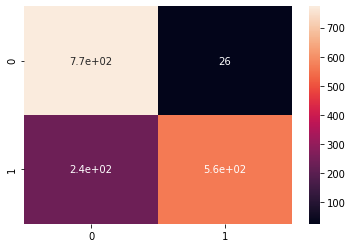

In [35]:
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)